Başlık ve açıklama lazım buraya

Bitcoin zamana bağlı değişimine göre gelecekte hangi seviyede olacağını tahmin edeceğiz

**Yatırım Tavsiyesi DEĞİLDİR**[ **TIKLA**](https://www.youtube.com/watch?v=gs_Gxhk44ZY)

Veriyi alalım

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-03-23 14:43:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-03-23 14:43:55 (6.04 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



pandas ile veriyi okuyup ayrıştıralım

In [2]:
import pandas as pd 
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"], #zdate olarak ayrıştırdık
                 index_col=["Date"]) 

veriye göz gezdirelim

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
len(df)

2787

Zaman serisi problemlerinde genelde diğer derin öğrenme problemlerine göre daha az veri olacaktır. Günlük BTC değerlerini aldığımızdan 1 yıl için 365 tane örneğimz oldu.

## Visualize

Kapanış fiyatını direkt olarak price olarak değiştirelim daha basit olur bizim içinde

In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'BTC Fiyat Grafiği')

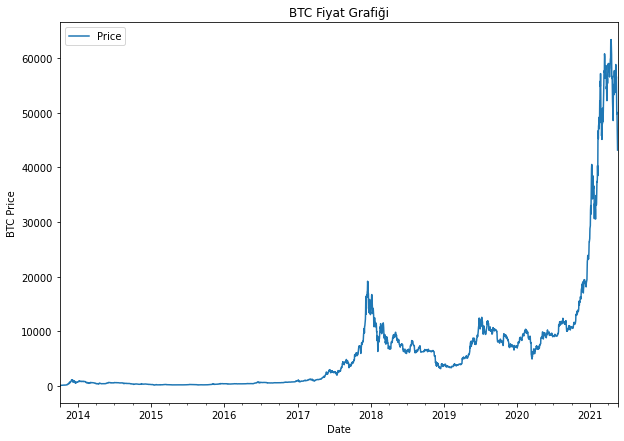

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("BTC Fiyat Grafiği")


### Veriyi CSV modülü ile okumak

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #ilk satır pas geç başlıklar var
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #tarih olarak alsın strig olarak değil diye
    btc_price.append(float(line[2])) #2. indexi closing price ı eklemek için


timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Yine çizdirelim

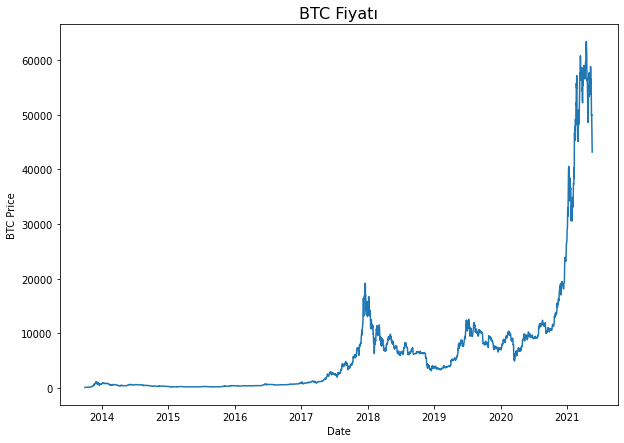

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("BTC Fiyatı", fontsize=16)
plt.xlabel("Date");

## Train-Test olarak ayırmak
**Yanlış yöntemi görelim**

In [10]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

çizdirelim ve neden yanlış olduğuna bakalım

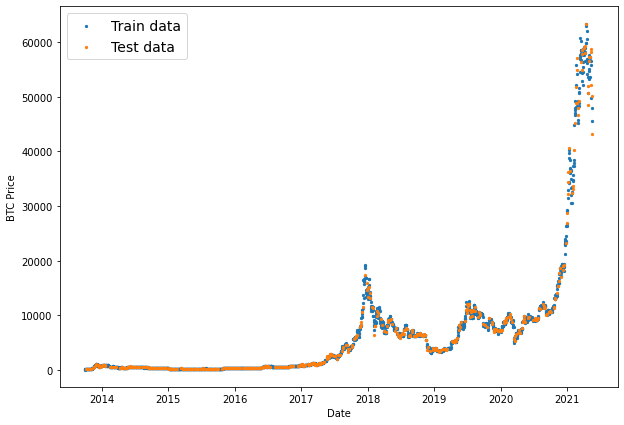

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

görüldüğü gibi zamana bağlı veriler ile geleckteki bir değeri tahmin etmeye çalıştığımız bu problemde veriyi rastgele train-test olarak bölemeyiz. Zamana bağlı olduğu için belirli uygun şekilde bölmeliyiz.


**Doğru Train-Test Kümesi oluşturma**

Belirli bir tarihten itibaren tamamen alırsak doğru bir şekilde ayırmış olur ve poroblemin mantığına uymuş oluruz.

In [13]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test 

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

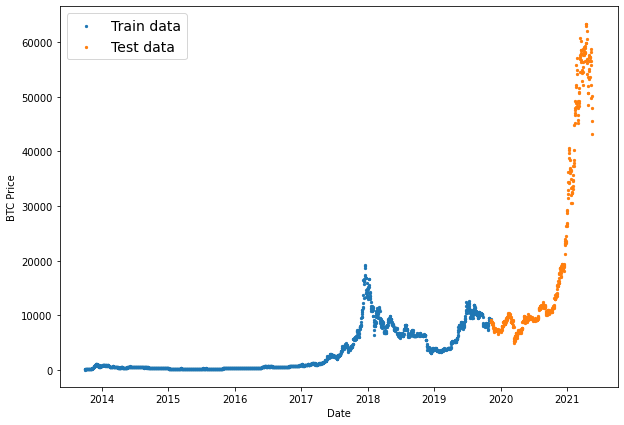

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Grafikler için fonksiyon

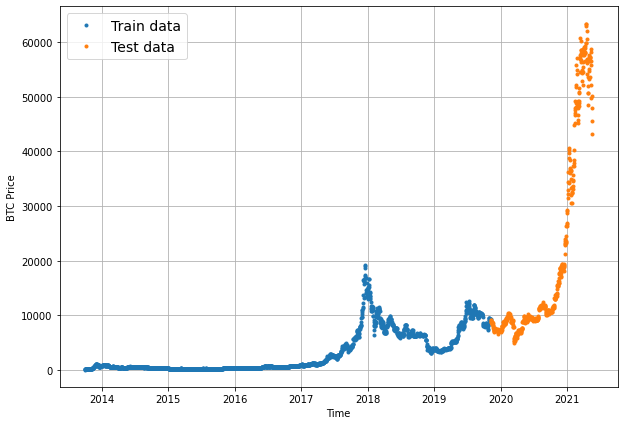

In [15]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Hangi Modelleri Deneyimleyeceğiz

**Horizon** = number of timesteps into the future we re going to predict (tahmin edeceğimiz zaman adımı sayısı)

**Window size** = number of timesteps we re going to use to predict horizon (horizon u tahmin etmek için kullanacağımız zaman adımı sayısı)

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive Forecast (baseline)

Horizon 1 için : t zaman adımındaki tahmin t-1 anındakine eşittir.

Google amca ile biraz araştırma yapmak lazım 

[Güzel Kaynak Bakılmalı](https://otexts.com/fpp3/simple-methods.html)




In [16]:
naive_forecast = y_test[:-1] #horizon 1 olduğu için son indexi pas geçtik

naive_forecast[:10], naive_forecast[-10:], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

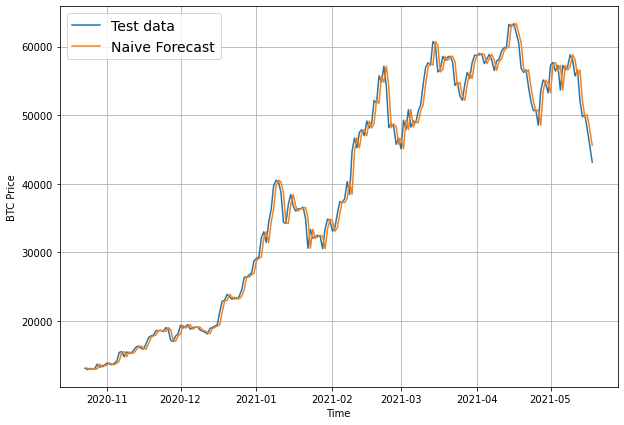

In [17]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Bir sürü farklı metric var. Hepsinin birbirine göre avantaj ve dezavantajları var. Probleme göre farklıları seçilir.
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  yani veride kış veya yaz gibi belirli zamanlarıda veride etkisi yok
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [20]:
#sonuc 1 e cok yakın cıkmalıy
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

Metrikleri deneyeceğimiz bir fonksiyon yazalım

In [21]:
def evaluate_preds(y_true, y_pred):
  #float32 datatype 
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

**Lower is better.** Bu sonuçları göre mase metriği bizim için en iyisi olabilir

In [23]:
#ortalama en düşük ve en yüksek değere bakalım
tf.reduce_min(y_test), tf.reduce_max(y_test), tf.reduce_mean(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>)

[Farklı modeller ve yöntemler için](https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts)

## Format Data Part 2: Windowing our dataset

Zaman serisi verisini bir supervised learning(denetimli öğrenme) problemine çevirmek için. 

Windowing nasıl bişi  ? 

Bir haftayı örnek olarak alırsak veriyi bölmeye ve bunlardan yeni veriler çıkartılır gibi düşün

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]


horizon = ufuk

In [24]:
print(f"Bunları {btc_price[:7]} kullanarak ,bunu  {btc_price[7]} tahmin etmeye çalışacağız")

Bunları [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] kullanarak ,bunu  123.033 tahmin etmeye çalışacağız


In [25]:
HORIZON = 1 #1 sonraki günü tahmin etmek için
WINDOW_SIZE = 7 #geçtiğimiz 1 haftayı kullanrak tahmin yapmak için

Labellar oluşturmak için fonksiyon yazalım ve deneyelim

In [26]:
def get_labelled_windows(x, horizon=HORIZON):
  """
  windowed data için label oluşturacağız

   horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [0 1 2 3 4 5 6] -> Label: 7


bu window dedigimiz seyi olusturmak icin fonksiyon yazalim

Fonksýonun alindigi yer burdan anlasilacak sekilde kendi oribrlemimize uyardalik
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [28]:
import numpy as np


def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
 
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  windowed_array = x[window_indexes]
  #print(windowed_array)
  
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

Fonksíyonumuzun neler yaptigina bakalaim daha iyi anlasilir

In [30]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Window'lari train-test kumelerine ayirma

Train-test kumelerini ayrimak icin fonksiyon 

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [32]:
# ne kadar varmis
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## Checkpoint callback

Neden checkpoint olusturdugumuzu daha once gorduk arastirilabilir
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [33]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True) #en iyi halini kaydedecek

## Model 1: Dense model (window = 7, horizon = 1)

* Tek dense layer, 128 hidden unit ve  ReLU
* Tek output ve lineer aktivasyon (aktivasyon fonksiyonu yok demekle ayni sey)
* Adam optimizaiton ve MAE loss function
* Batch size 128 
* 100 epochs

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

# 1.model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")          
], name="model_1_dense") 

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0, #1 yapip ilerleyisi gorebilirsiniz cok yer kaplamasin diye 0 kalsin
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
INFO:tensorflow:Assets written to: mod

In [35]:
#modeli  degerlendirelim
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.6349 - mae: 586.6349 - mse: 1211656.0000


[586.6349487304688, 586.6349487304688, 1211656.0]

In [36]:
#checkpoint ile kaydedilen en iyi halini load edelim
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.9287 - mae: 566.9287 - mse: 1171011.6250


[566.9287109375, 566.9287109375, 1171011.625]

evvet daha iyi sonuc aldik

## Model ile tahminler yabalim(test verisi ile)

Aslinda tahminler(forecast) gelecegin tahmini olmali ama burda test kumesi bir nevi gelecegi temsil edecek sekildedir.

In [37]:
def make_preds(model, input_data):
  
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # 1D array lazim o yuzden

In [38]:
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8879.213, 8812.859, 9002.563, 8782.641, 8775.035, 8715.615,
        8685.107, 8549.655, 8457.502, 8525.292], dtype=float32)>)

Tahmini naive ile kiyaslayalim ne kadar iyi oldugunu gormemize yardim edecektir

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 566.9288,
 'mape': 2.5506177,
 'mase': 0.9959368,
 'mse': 1171011.6,
 'rmse': 1082.1329}

In [40]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

Grafigine bakalim

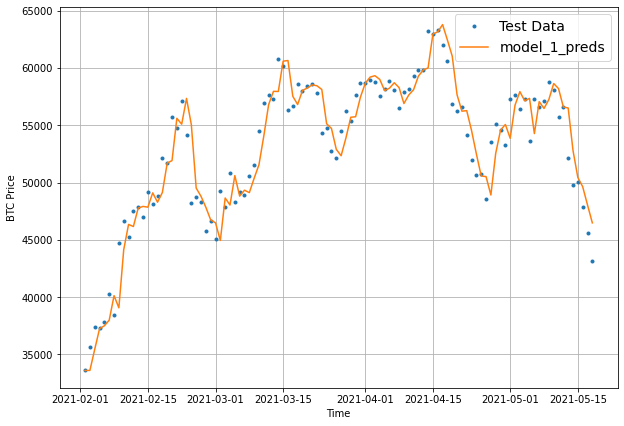

In [41]:
offset = 450
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [42]:
HORIZON = 1 
WINDOW_SIZE = 30 #30 gunluk olarak alacagiz yani

In [43]:
#window'lari olusturalim
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [44]:
#train-test ayrimini yapalim
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

verimiz hazir simid modeli olusturup baslayalim

In [45]:
# model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [46]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 798.5907


798.5906982421875

In [47]:
#en iyi oerformansa sahip modeli yukleyelim
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 623.6022


623.6021728515625

tekrar tahmin yaptirip

In [48]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [49]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 623.6022,
 'mape': 2.8273838,
 'mase': 1.0900627,
 'mse': 1338026.2,
 'rmse': 1156.731}

In [50]:
model_1_results

{'mae': 566.9288,
 'mape': 2.5506177,
 'mase': 0.9959368,
 'mse': 1171011.6,
 'rmse': 1082.1329}

model 1 model 2 den daha iyi bir performans gosterdi bunu degerlendirelim window buyuklugunu arttirdik 

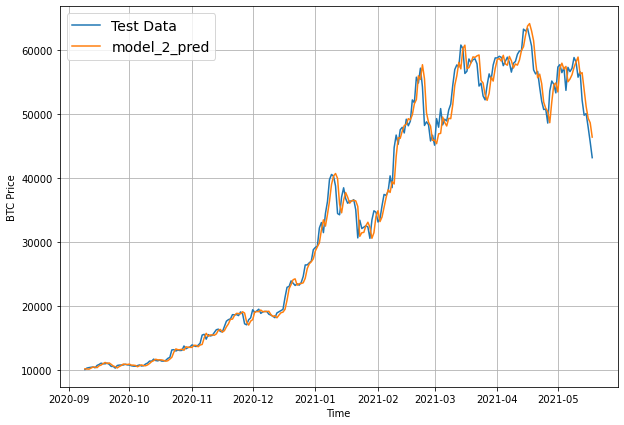

In [53]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start= offset, format= "-",label = "model_2_pred")  

## Model 3: Dense (window = 30, horizon = 7)

hizlica ayni islemleri yapiyoruz

In [54]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [62]:
# Model 
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [63]:
#test verisinde degerlendirme
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1451.5640


1451.56396484375

In [58]:
#en iyi performansli modeli alalim
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1225.0725


1225.072509765625

HORIZON - WINDOW sayisi arttikca goruldugu gibi model daha kotu performans gosteriyor.

In [59]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9315.244 , 9500.475 , 9444.725 , 9646.714 , 9521.576 , 9798.976 ,
        9539.416 ],
       [8954.446 , 9198.7295, 9168.179 , 9395.464 , 9080.252 , 9320.579 ,
        9186.945 ],
       [8899.025 , 8953.83  , 8986.562 , 9260.812 , 9051.414 , 8911.248 ,
        9157.576 ],
       [9112.361 , 9226.18  , 9126.239 , 9413.1045, 9411.557 , 9308.665 ,
        9196.985 ],
       [9079.77  , 8983.34  , 9011.312 , 9027.437 , 9056.427 , 9091.644 ,
        8852.652 ]], dtype=float32)>

In [60]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 744.94574 ,  435.11496 ,  379.25433 ,  629.8471  ,  460.3065  ,
         405.45053 ,  397.95035 ,  568.5135  ,  594.2739  ,  571.2958  ,
         795.9805  ,  790.9246  ,  738.77264 ,  808.35516 ,  628.08075 ,
         207.90012 ,  191.50795 ,  256.16672 ,  255.73055 ,  275.8762  ,
         177.5256  ,  180.21819 ,  252.75098 ,  311.41608 ,  159.98326 ,
          98.60303 ,  136.53215 ,  140.62619 ,  122.300644,  140.2018  ,
         348.095   ,  386.37723 ,  327.42773 ,  364.22147 ,  321.4421  ,
         251.47496 ,  339.7419  ,  252.58287 ,  205.20222 ,  273.24057 ,
         531.80664 ,   79.296524,  103.48298 ,   66.59257 ,   67.66044 ,
         139.50188 ,   76.87165 ,   97.55685 ,   64.83363 ,  159.73988 ,
         139.80762 ,  120.07129 ,  270.78244 ,  197.35916 ,  253.20451 ,
         349.30246 ,  541.1144  ,  462.28564 ,  476.66803 ,  519.4635  ,
         349.52545 ,  226.38916 ,  256.0323  ,  404.69183 ,  422.94135 ,
         398.12115 ,  429.99875 ,  528.7169 

model 3 un sonuclarinin bU kadar fazla cikmasi HORIZON sayisnin artmasiyla artan dimension sayisi bunu da cozecez

In [64]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

##### **Yuksek HORIZON sayisi ile tahmin yapmak icin evaluation fonksiyonunu duzenliyelim**

In [65]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #bu blok ile eger dimension sayisi 0 dan buyukse onu 0 dimensiona dusurecegiz
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

tekrar deneyelim

In [66]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1225.0724,
 'mape': 5.4491835,
 'mase': 2.179948,
 'mse': 5381287.5,
 'rmse': 1412.7332}

hallettigimize gore grafige bakalim

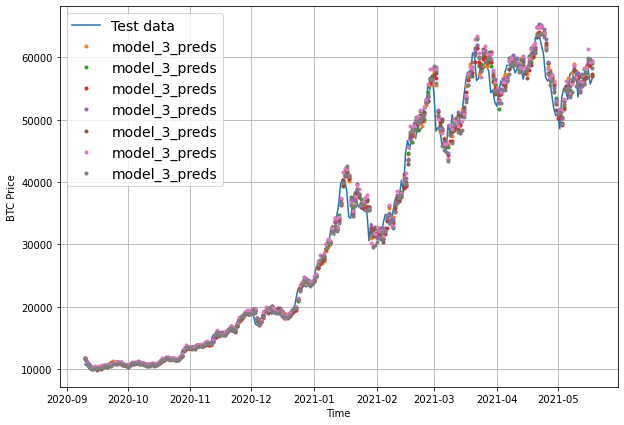

In [67]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


biraz karisi nedenine bakalim

In [68]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9315.244 , 9500.475 , 9444.725 , 9646.714 , 9521.576 , 9798.976 ,
        9539.416 ],
       [8954.446 , 9198.7295, 9168.179 , 9395.464 , 9080.252 , 9320.579 ,
        9186.945 ],
       [8899.025 , 8953.83  , 8986.562 , 9260.812 , 9051.414 , 8911.248 ,
        9157.576 ],
       [9112.361 , 9226.18  , 9126.239 , 9413.1045, 9411.557 , 9308.665 ,
        9196.985 ],
       [9079.77  , 8983.34  , 9011.312 , 9027.437 , 9056.427 , 9091.644 ,
        8852.652 ]], dtype=float32)>

HORIZON 7 oldugu icin tahminleri de 7 tane yapmis oluyor bunu ortalamaya ve 1 tane olacak sekilde ayarlayip tekrar grafige bakalim

In [69]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9538.161>

bunu yapmak bize bilgi kaybina yol acar ama grafigi cizdirmek icin yararli olabilir.

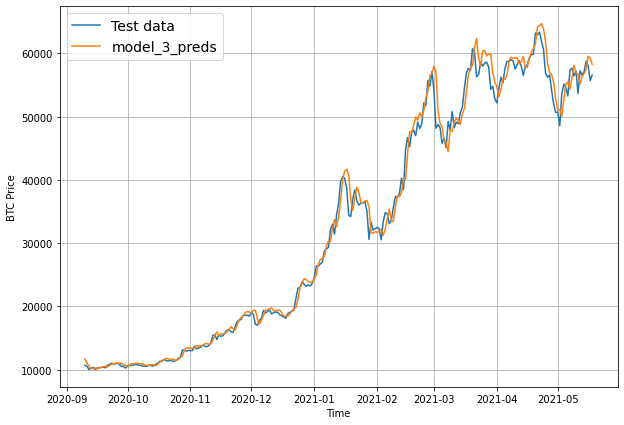

In [70]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

**Simdi hangi modelin daha iyi oldugunu secebilmek icin ufak bir grafik olusturalim**

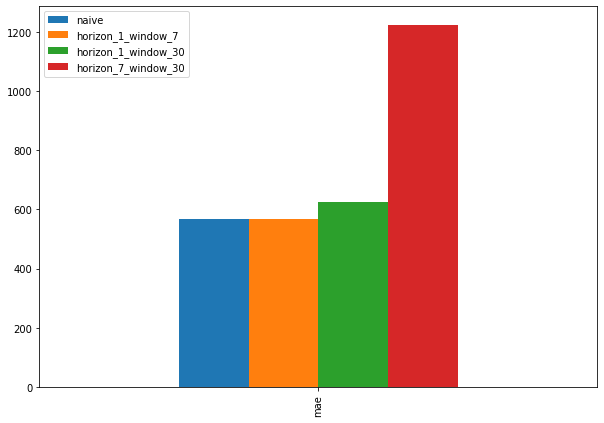

In [75]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize= (10,7), kind ='bar')

Goruldugu gibi HORIZON ve WINDOW arttikca yani daha uzun bir gelecegi tahmin etmeye calistikca modelin performansi azaldi normal bir sekilde.

Okunacak📓**AutoCorelation** = https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424